### **Predicting Diabetes**

### Introduction 

Diabetes is a disease that affects millions of people worldwide, and can be caused by both genetic and/or environmental effects. People with this disease are unable to produce adequate amounts of insulin, a hormone that regulates blood sugar levels. Because of this sugar will build up in the bloodstream which causes a variety of health issues which can worsen over time. This disease is can have very tragic effects, and due to stigma people are often hesitant to receive the treatment they need. This treatment is very important because diabetes does not have to be a deadly disease. With the correct treatment and lifestyle choices, patients can prevent complications and live long, happy lives. 

It is important we study the causes of diabetes in order to predict it, and treat it before any serious consequences. The dataset “Predict Diabetes” from the National Institute of Diabetes and Digestive and Kidney helps us reach this objective. This dataset the diagnostic measurements age (in years) , pregnancies (amount they have had), blood glucose levels (mg/dL), blood pressure, skin thickness, blood insulin level, BMI (kg/m2), and Diabetes pedigree function (probability of having diabetes based on family history) , are all recorded as well as the outcome (whether they have diabetes or not). The inclusion criteria of the participants is that they are all female and at least 21 years old. 

Though this dataset contains many diagnostic measurements as predictors, we decided to base our data analysis on 3 predictors: age, BMI, and glucose levels. Our analysis will answer the question of “Can we predict a patient has diabetes based on their age, BMI, and the level of glucose in their blood?” Looking at the dataset in its whole, we decided on these predictors for a variety of reasons. One reason is that many columns had many missing values making them more difficult to include in the dataset. To ensure that our prediction is accurate, we must choose the predictors that have a lot of variability, and that have many recorded values. The data for age, BMI, and glucose levels have both of these desired qualities, while other variables do not.

### Preliminary exploratory data analysis

In [169]:
#install libraries
library(repr)
library(tidyverse)
library(tidymodels)

#load the dataset into R x
diabetes_data <- read_csv("data/diabetes.csv")
diabetes_data

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [184]:
#the dataset is already in a tidy data format

#extracting the columns that we want
diabetes_data <- diabetes_data|>
                 select(Glucose, BMI, DiabetesPedigreeFunction, Outcome)


#Since zeros are meaningless in the context, they are missing data. 
#count number of missing data in each column

missing_data <- diabetes_data|>
                 filter(Glucose == 0|BMI == 0)|>
                 nrow()

missing_data

#move out zeros(missing data)

diabetes__data <- diabetes_data|>
                 filter(Glucose!= 0)
  

diabetes__data <- diabetes__data|>
                 filter(BMI!= 0)

diabetes__data#here is final dataset

[1] 16

Glucose,BMI,DiabetesPedigreeFunction,Outcome
<dbl>,<dbl>,<dbl>,<dbl>
148,33.6,0.627,1
85,26.6,0.351,0
183,23.3,0.672,1
89,28.1,0.167,0
137,43.1,2.288,1
116,25.6,0.201,0
78,31.0,0.248,1
115,35.3,0.134,0
197,30.5,0.158,1


In [185]:
#split the data and get the training data
diabetes_split <- initial_split(diabetes__data, prop = 0.75, strata = Outcome)
diabetes_train <- training(diabetes_split)

#count number of rows
num_of_obs <- diabetes_train |>
              nrow()

#mean of each predictor
mean_of_predictors <- diabetes_train|>
                      summarize(mean_Glucose = mean(Glucose),
                                mean_BMI = mean(BMI),
                                mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction))
                
diabetes_summarize_table1 <- mean_of_predictors|>
                   mutate(missing_data = missing_data, num_of_obs = num_of_obs)

diabetes_summarize_table1

diabetes_summarize_table2 <- diabetes_train|>
                             group_by(Outcome)|>
                             summarize(count = n())
diabetes_summarize_table2

mean_Glucose,mean_BMI,mean_DiabetesPedigreeFunction,missing_data,num_of_obs
<dbl>,<dbl>,<dbl>,<int>,<int>
122.844,32.66755,0.4709486,16,564


Outcome,count
<dbl>,<int>
0,366
1,198


In [206]:
#convert outcome to a factor type
diabetes_train <- diabetes_train|>
                  mutate(Outcome = as.factor(Outcome))
diabetes_train

Glucose,BMI,DiabetesPedigreeFunction,Outcome
<dbl>,<dbl>,<dbl>,<fct>
116,25.6,0.201,0
115,35.3,0.134,0
110,37.6,0.191,0
139,27.1,1.441,0
103,43.3,0.183,0
126,39.3,0.704,0
99,35.4,0.388,0
97,23.2,0.487,0
117,34.1,0.337,0


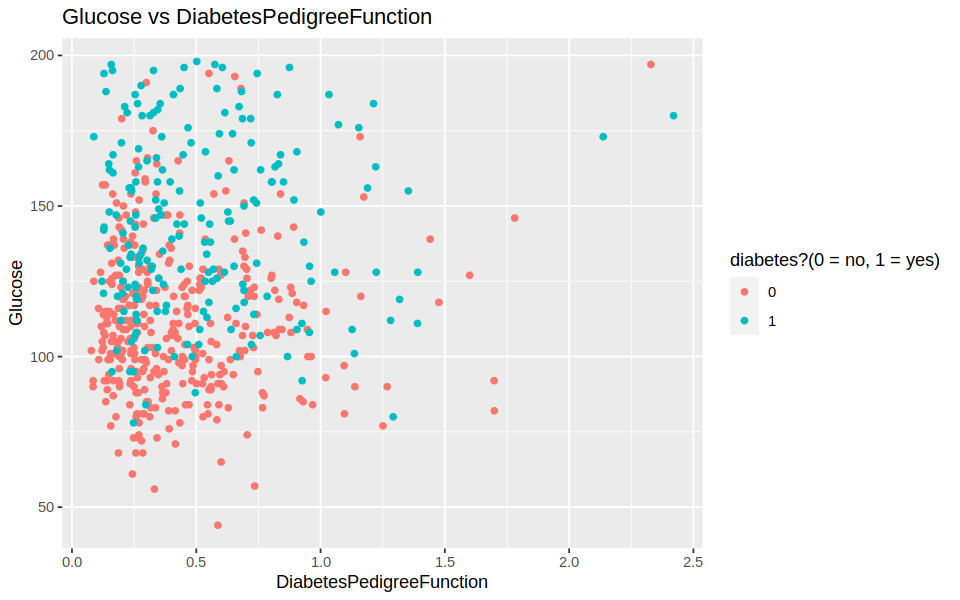

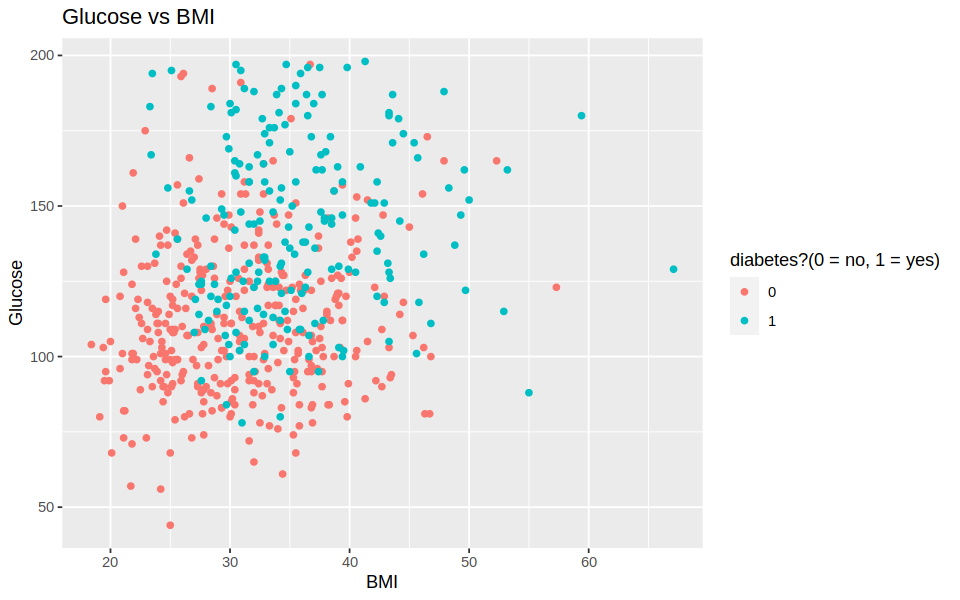

In [207]:
#make scatterplots to visualize the data
options(repr.plot.width = 8, repr.plot.height = 5)

diabetes_plot_1 <- diabetes_train |>
    ggplot(aes(x = DiabetesPedigreeFunction, y = Glucose, color = Outcome)) + 
        geom_point() + 
        xlab("DiabetesPedigreeFunction") +
        ylab("Glucose") +
        labs(color = "diabetes?(0 = no, 1 = yes)") +
        ggtitle("Glucose vs DiabetesPedigreeFunction")
diabetes_plot_1

diabetes_plot_2 <- diabetes_train |>
    ggplot(aes(x = BMI, y = Glucose, color = Outcome)) + 
        geom_point() + 
        xlab("BMI") +
        ylab("Glucose") +
        labs(color = "diabetes?(0 = no, 1 = yes)") +
        ggtitle("Glucose vs BMI")
diabetes_plot_2

### Methods

The columns from the data we are planning to use
are Glucose, BMI and Age. We found these to be the most influential factors contributing to the outcome. 

These three variables will be used to analyze and predict if the patient has diabetes or not. We will use the K-nearest neighbors classification for this with these three factors as the predictors. As the data is not scaled, it is first important to scale and standardize the data so that all predictors have uniform priority. 

After the classification, we can visualize the results using plots of BMI vs Age, Age vs Glucose and BMI vs Glucose, and showing if the person has diabetes using color.

### Expected Outcomes and Significance

Based on the factors age, BMI, and glucose level can be indicators for predicting diabetes. It is expected to find that older age, higher BMI, and elevated glucose levels are associated with a higher likelihood of having diabetes. By analyzing these factors, predictions can be made about a patient's risk of diabetes.

Such findings can have a significant impact on healthcare. By identifying the factors that contribute to the likelihood of having diabetes, healthcare professionals can better assess a patient's risk and provide targeted interventions and preventive measures. This can lead to earlier detection, improved management, and ultimately better health outcomes for individuals at risk of diabetes.

These findings can lead to several future questions and opportunities for research. For example, researchers could explore the effectiveness of intervention programs targeting the identified risk factors to prevent or delay the onset of diabetes. They could also investigate the impact of lifestyle modifications, such as diet and exercise, on reducing the risk of developing diabetes in specific age groups or BMI categories. Additionally, further studies can be conducted to understand the underlying mechanisms linking age, BMI, and glucose levels to the development of diabetes.